In [55]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [56]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('VCG.csv')
df1=df.reset_index()['Price']

In [57]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

# Dự đoán theo tỉ lệ 7:3

In [58]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [59]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [60]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [61]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [62]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 11s 314ms/step - loss: 0.0334 - val_loss: 0.0198
Epoch 2/100
16/16 [==============================] - 3s 193ms/step - loss: 0.0042 - val_loss: 0.0059
Epoch 3/100
16/16 [==============================] - 3s 191ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 4/100
16/16 [==============================] - 4s 266ms/step - loss: 0.0010 - val_loss: 0.0069
Epoch 5/100
16/16 [==============================] - 3s 195ms/step - loss: 9.6408e-04 - val_loss: 0.0062
Epoch 6/100
16/16 [==============================] - 3s 194ms/step - loss: 9.2793e-04 - val_loss: 0.0059
Epoch 7/100
16/16 [==============================] - 3s 194ms/step - loss: 8.8979e-04 - val_loss: 0.0057
Epoch 8/100
16/16 [==============================] - 4s 261ms/step - loss: 8.8456e-04 - val_loss: 0.0057
Epoch 9/100
16/16 [==============================] - 3s 193ms/step - loss: 8.6400e-04 - val_loss: 0.0052
Epoch 10/100
16/16 [==============================] - 3s 190ms/step - 

In [64]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

12/12 [==============================] - 0s 38ms/step


In [65]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((ytest- y_pred) / ytest) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 72.00568632107641


In [66]:
y_pred

array([[0.8311504 ],
       [0.8681373 ],
       [0.8769792 ],
       [0.83898383],
       [0.77562857],
       [0.73913515],
       [0.7315218 ],
       [0.73532504],
       [0.7513889 ],
       [0.7736328 ],
       [0.7836275 ],
       [0.7734269 ],
       [0.76599675],
       [0.7935279 ],
       [0.8346408 ],
       [0.8602276 ],
       [0.868855  ],
       [0.89830106],
       [0.924181  ],
       [0.93639374],
       [0.9315343 ],
       [0.9178279 ],
       [0.8976302 ],
       [0.88131225],
       [0.89277613],
       [0.934499  ],
       [0.96515673],
       [0.97326434],
       [0.9324591 ],
       [0.9046626 ],
       [0.8916986 ],
       [0.85637414],
       [0.84310436],
       [0.82009816],
       [0.79437214],
       [0.7920964 ],
       [0.81596285],
       [0.83408725],
       [0.8087313 ],
       [0.78313   ],
       [0.74876064],
       [0.70989424],
       [0.68917   ],
       [0.69660497],
       [0.707508  ],
       [0.7249544 ],
       [0.73929435],
       [0.744

In [67]:
test_data

array([[0.68942959],
       [0.67029707],
       [0.72553249],
       [0.7276695 ],
       [0.70853698],
       [0.70853698],
       [0.71492287],
       [0.72342062],
       [0.73191838],
       [0.7276695 ],
       [0.72553249],
       [0.72658843],
       [0.70003922],
       [0.70642511],
       [0.71278586],
       [0.69154146],
       [0.68093184],
       [0.68093184],
       [0.67668296],
       [0.68093184],
       [0.67454595],
       [0.7276695 ],
       [0.72978137],
       [0.73403025],
       [0.7276695 ],
       [0.70109515],
       [0.69048553],
       [0.67879483],
       [0.68729258],
       [0.66604819],
       [0.65330155],
       [0.65755043],
       [0.65755043],
       [0.68623665],
       [0.67668296],
       [0.68093184],
       [0.69792735],
       [0.68729258],
       [0.68942959],
       [0.69154146],
       [0.69154146],
       [0.68518072],
       [0.68518072],
       [0.67879483],
       [0.67668296],
       [0.66393632],
       [0.67029707],
       [0.669

In [68]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [69]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size1 = len(df1) - train_size -101

train_data = df1[:train_size]
test_data1 = df1[train_size:train_size+test_size1]

In [70]:
test_data1=scaler.inverse_transform(test_data1)

In [71]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - test_data1)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 9945.854147895101


In [72]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=422
i=0
while(i<30):

    if(len(temp_input)>422):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.66338321 0.66554536 0.66338321 0.65244675 0.65682134 0.65682134
 0.65463404 0.65463404 0.65025946 0.65025946 0.65025946 0.64151029
 0.65244675 0.65025946 0.65244675 0.68304371 0.685231   0.685231
 0.73222008 0.71364066 0.70489149 0.69398017 0.70926608 0.70707878
 0.71037229 0.74205032 0.76392325 0.777047   0.82511716 0.81747421
 0.85244575 0.83605362 0.78795833 0.78795833 0.77267242 0.79889479
 0.7945202  0.81420584 0.87977433 0.89071079 0.87102516 0.80326937
 0.7486122  0.76062974 0.75079949 0.74534383 0.77375349 0.79014562
 0.777047   0.75517408 0.77375349 0.8426155  0.8600887  0.86338221
 0.87539975 0.9519047  0.94315553 0.95627929 0.94534283 0.93659366
 0.91255858 0.9059967  0.94753012 1.         0.99343812 0.99781271
 0.91255858 0.94753012 0.91912046 0.8426155  0.88633621 0.80872503
 0.7967075  0.82184879 0.85136467 0.83605362 0.76281703 0.78795833
 0.71801525 0.68304371 0.68960558 0.71364066 0.69616746 0.731139
 0.73003278 0.72784549 0.70926608 0.7256582  0.7595486

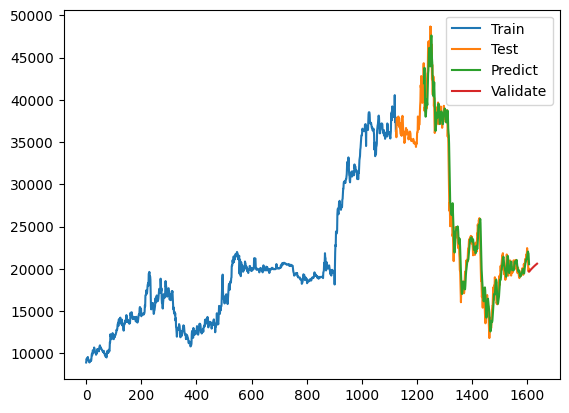

In [73]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# Dự đoán theo tỉ lệ 8:2

In [74]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [75]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [76]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [77]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [78]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 11s 245ms/step - loss: 0.0329 - val_loss: 0.0040
Epoch 2/100
19/19 [==============================] - 3s 184ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 3/100
19/19 [==============================] - 5s 244ms/step - loss: 0.0018 - val_loss: 0.0029
Epoch 4/100
19/19 [==============================] - 3s 181ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 5/100
19/19 [==============================] - 3s 181ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 6/100
19/19 [==============================] - 4s 225ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 7/100
19/19 [==============================] - 4s 185ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 8/100
19/19 [==============================] - 4s 239ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 9/100
19/19 [==============================] - 4s 215ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 10/100
19/19 [==============================] - 4s 209ms/step - loss: 0.0013 - val_l

In [80]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

7/7 [==============================] - 1s 38ms/step


In [81]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((ytest- y_pred) / ytest) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 36.75137381407304


In [82]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [83]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size1 = len(df1) - train_size -101

train_data = df1[:train_size]

test_data1 = df1[train_size:train_size+test_size1]

In [84]:
test_data1=scaler.inverse_transform(test_data1)

In [85]:
len(test_data) - len(y_pred)

101

In [86]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - test_data1)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 6988.749225491286


In [87]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=261
i=0
while(i<30):

    if(len(temp_input)>261):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.38388745 0.36560973 0.34959472 0.34046843 0.36560973 0.3701603
 0.36560973 0.32445343 0.31075142 0.27417084 0.27417084 0.23990326
 0.20789839 0.17931274 0.20674189 0.2124741  0.21702468 0.22733261
 0.2376154  0.24103461 0.21589332 0.23349223 0.23852049 0.21715039
 0.2058368  0.20835093 0.23852049 0.25109113 0.2699471  0.26366178
 0.27120417 0.27623243 0.30263079 0.29383133 0.30514491 0.29760253
 0.30640198 0.30011666 0.3164585  0.33908566 0.33908566 0.34159979
 0.36171283 0.36674108 0.36422696 0.36045576 0.37176934 0.37176934
 0.36799815 0.3767976  0.35417044 0.3554275  0.36296989 0.37428347
 0.36422696 0.35794163 0.34159979 0.31897263 0.34411392 0.34537098
 0.34537098 0.33657153 0.32148676 0.32148676 0.32022969 0.34034273
 0.35668457 0.34159979 0.32902914 0.33657153 0.33028621 0.35417044
 0.38433999 0.37931173 0.41073835 0.40319596 0.38811118 0.40068183
 0.42456606 0.40948128 0.42959432 0.42456606 0.37931173 0.3378286
 0.3126873  0.27623243 0.24229168 0.25737646 0.22469

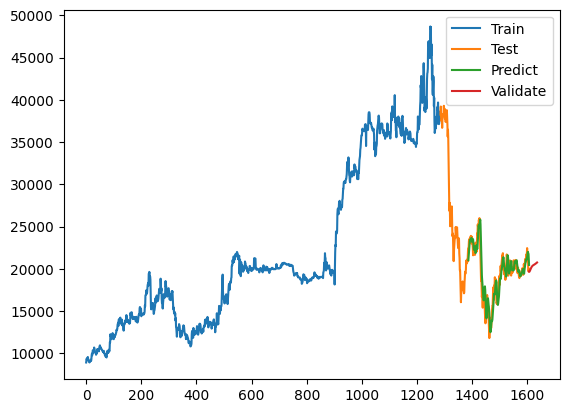

In [88]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# Dự đoán theo tỉ lệ 9:1

In [89]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [90]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [91]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [92]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [93]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [94]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 12s 228ms/step - loss: 0.0404 - val_loss: 0.0022
Epoch 2/100
22/22 [==============================] - 5s 223ms/step - loss: 0.0049 - val_loss: 6.4469e-04
Epoch 3/100
22/22 [==============================] - 4s 171ms/step - loss: 0.0023 - val_loss: 5.6083e-04
Epoch 4/100
22/22 [==============================] - 4s 168ms/step - loss: 0.0020 - val_loss: 4.5254e-04
Epoch 5/100
22/22 [==============================] - 5s 223ms/step - loss: 0.0020 - val_loss: 5.5516e-04
Epoch 6/100
22/22 [==============================] - 4s 170ms/step - loss: 0.0019 - val_loss: 5.4107e-04
Epoch 7/100
22/22 [==============================] - 4s 170ms/step - loss: 0.0022 - val_loss: 6.4578e-04
Epoch 8/100
22/22 [==============================] - 5s 224ms/step - loss: 0.0017 - val_loss: 4.6040e-04
Epoch 9/100
22/22 [==============================] - 4s 170ms/step - loss: 0.0017 - val_loss: 4.4050e-04
Epoch 10/100
22/22 [==============================] - 4s 1

In [95]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

2/2 [==============================] - 0s 41ms/step


In [96]:
# Tính toán sai số tuyệt đối và chuẩn hóa thành phần trăm
errors = np.abs((ytest- y_pred) / ytest) * 100

# Tính giá trị MAPE
mape = np.mean(errors)

print('Testing MAPE:', mape)

Testing MAPE: 8.223105943176055


In [97]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [98]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size1 = len(df1) - train_size -101

train_data = df1[:train_size]
test_data1 = df1[train_size:train_size+test_size1]

In [99]:
test_data1=scaler.inverse_transform(test_data1)

In [100]:
len(test_data) - len(y_pred)

101

In [101]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - test_data1)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 4195.948973188597


In [102]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.30137372 0.30891611 0.31897263 0.30011666 0.32525795 0.28754601
 0.27497536 0.29383133 0.2913172  0.26240471 0.27246123 0.27497536
 0.26114765 0.24606287 0.24983407 0.28251775 0.2913172  0.30011666
 0.32148676 0.3164585  0.2950884  0.30137372 0.28251775 0.25863352
 0.25863352 0.28880307 0.27748949 0.26869004 0.2737183  0.28126069
 0.30388785 0.30137372 0.29383133 0.28251775 0.25863352 0.28503188
 0.27623243 0.28000362 0.26617591 0.27748949 0.27120417 0.27120417
 0.28251775 0.30388785 0.29760253 0.29760253 0.29006014 0.28754601
 0.30263079 0.29885959 0.30514491 0.30388785 0.30137372 0.27748949
 0.28126069 0.28126069 0.27623243 0.26617591 0.26617591 0.28251775
 0.27120417 0.26869004 0.25863352 0.25360526 0.25109113 0.26114765
 0.25863352 0.25737646 0.26114765 0.25737646 0.26743297 0.2699471
 0.27120417 0.27120417 0.28000362 0.27623243 0.27497536 0.26114765
 0.26114765 0.26617591 0.29257427 0.28503188 0.28503188 0.29383133
 0.29760253 0.30640198 0.30891611 0.30137372 0.3001

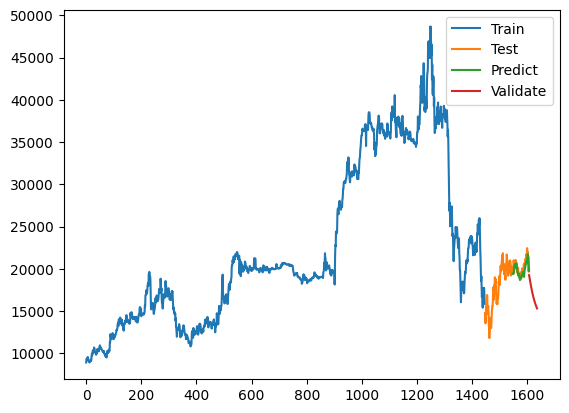

In [103]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

In [104]:
data=scaler.inverse_transform(lst_output)
data

array([[19248.34878883],
       [19100.77917275],
       [18912.50077882],
       [18719.84769078],
       [18531.24212829],
       [18347.01540877],
       [18166.4242906 ],
       [17989.1990968 ],
       [17815.58875997],
       [17646.13204138],
       [17481.44356748],
       [17322.08699279],
       [17168.47898307],
       [17020.86491474],
       [16879.31413331],
       [16743.73773428],
       [16613.93360809],
       [16489.6065918 ],
       [16370.42062639],
       [16256.01061072],
       [16146.0203341 ],
       [16040.10899594],
       [15937.96839397],
       [15839.32114615],
       [15743.92246877],
       [15651.56669607],
       [15562.07246288],
       [15475.29218773],
       [15391.09132847],
       [15309.35845813]])